<h3 align="Center">
    <img alt="Logo" title="#logo" width="250px" src="https://www.insart.com/wp-content/uploads/Enova.png">
    <br>
</h3>

# <center> **Diamond prices model**
## <center> **Methodologic report**
### <center> **Analytics team**
### <center> Analysts:
### <center> *Kevin M. Figueroa*
### <center> *Dec 6th 2022*

In [6]:
# Importing libraries Libraries
# User defined functions
from enova_functions import *                                                   # See file enova_functions.py
# Standard libraries
import numpy as np
import pandas as pd
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
#from pandas import MultiIndex, Int16Dtype
# Plotting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ks_2samp
from pycaret.classification import *
# Date and time libraries
import datetime as dt
import time as tm
# Keep graphs in line
%matplotlib inline
# Show all columns in pandas
pd.set_option('display.max_columns', 500)
# Graphing style
plt.style.use('seaborn-colorblind')

## 0. Importing and setting up data

In [7]:
# Import training dataset
df_train = pd.read_csv('data/training.csv', index_col='id')
# Import offers to make dataset
df_offers = pd.read_csv('data/offers.csv', index_col='id')

# Standarizing column names for both datasets
df_train.columns = [x.strip().lower() for x in df_train.columns]
df_offers.columns = [x.strip().lower() for x in df_offers.columns]

df_train.head(3)

,carats,cert,clarity,color,cut,depth,known_conflict_diamond,measurements,polish,regions,shape,symmetry,table,vendor,price,retail,logprice,logretail
id,,,,,,,,,,,,,,,,,,
1,0.41,NaN,SI1,L,,65.4,False,4.65x4.62x3.03,Very good,Other/Unknown,Princess,Good,NaN,1,430,850,6.063785,6.745236
2,0.42,AGSL,SI2,L,,61.7,False,4.85x4.79x2.98,Excellent,Russia,Marquise,Very good,NaN,1,560,920,6.327937,6.824374
3,0.40,AGSL,SI1,L,,64.0,False,4.66x4.63x2.97,Excellent,South Africa,Round,Excellent,57.0,1,560,575,6.327937,6.354370


## 1. Exploratory data analysis

#### Shapes exploration
- Training dataset contains 8,050 diamond instances and 14 explicative variables of diamonds to explore and find a good model to predict the distributor's price and retail price (logprice and logretail are derived from the targets)

- Offers dataset contains 2,683 possible diamonds to make an offer for with 14 explicative variables

**shapes_exploration function** 

Explores the shapes and columns of training and testing dataset

In [8]:
shapes_exploration(df_train, df_offers)

Training dataset
- Observations: 8050
- Attributes: 14
- Target: 1
Offers dataset
- Observations: 2683
- Attributes: 14


### Features exploration
Summary tables below contains a summary for the variables contained in both sets. We are dealing with a set of mostly qualitative variables that must be transformed to make numerical sense out of them

Training dataset contains the following features:

- *carats*: "The weight of the diamond in carats" - A positive relationship between carats and diamond price is expected.

- *cert*: "The organization that certified the diamond"  - A certificate gives a diamond certainty and should be positively related with the price. This feature contains null values to consider. 

- *clarity*: "The code for the clarity of the diamond (A measure of the position and size of inclusions in the diamond) Ratings are often given in the Modern GIA grading scale, Flawless, Internally Flawless, Very Very Slightly Included, Very Slightly Included, Slightly Included, and Included, with various sub-levels" 

<h3 align="Left">
    <img alt="Logo" title="#logo" width="500px" src="https://www.datocms-assets.com/25216/1652905572-d-clarity-chart.jpg?q=25&auto=format&w=1982">
    <br>
</h3>

- *color*: "The code for the color of the diamond. Diamonds are generally rated on a scale from D meaning colorless, to Z having the most yellow. Some diamonds are "rated on seperate scales, espcially “fancy color” diamonds. - More research is needed for this feature regarding fancy colors.

<h3 align="Left">
    <img alt="Logo" title="#logo" width="500px" src="http://aginewyork.com/wp-content/themes/agi/images/shape/color_scale.1337272053.jpg">
    <br>
</h3>


- *cut*: "The quality of the cut of the diamond"  - Labels in this feature are self-explanatory with values such as Excelent, Good, Fair, etc.

- *depth*: "Depth percentage of the diamond" - The total depth percentage tells if the diamond is over or under weight. Graders calculate it by dividing the average girdle diameter (the width of the diamond) by the table to culet length (or height) of the diamond and multiplying it by one hundred. Ideally, the total depth percentage should range from 57.5 to 63%. This feature contains null values to consider. 

- *known_conflict_diamond*: "A flag identifying if the diamond was known to have been illegally traded" - This feature should be negatively correlated to the target variables. 

- *measurements*: "The length x width x depth of the diamond expressed in millimeters." - This feature needs to be sseparated into its' components. 

- *polish*: "The quality of the polish of the diamond" - Labels are self-explanatory

- *regions*: "The region from which the diamond originated"

- *shape*: "The shape the diamond was cut into"
<h3 align="Left">
    <img alt="Logo" title="#logo" width="200px" src="https://www.invaluable.com/blog/wp-content/uploads/sites/77/2017/12/diamond-shapes-chart.jpg">
    <br>
</h3>

- *symmetry*: "The quality of the symmetry of the diamond" - Labels are self-explanatory

- *table*: "The table percentage of the diamond" - The ideal table percentage will vary based on the shape of your diamond. For example, the ideal table for round-cut diamonds is between 54-60 percent, while the ideal dimensions for emerald-cut diamonds puts table percentage between 66-72 percent. This feature contains null values to consider. 

- *vendor*: "The vendor selling the diamond"

**Targets**

- *price*: "The price which you can acquire the diamond for (Only available in the training dataset)" - Prices range from $395 to $1,087,785 with a mean value of $15,081.01 and a median of $2,690. 

- *retail*: "The price which you can sell the diamond for (Only available in the training dataset)" - Retail prices range from $45 to $16,75,190 with a mean value of $21,494.78 and a median of $10,335. From this simple facts we can already discard many diamonds as some retail prices are lower than the min value of acquiring price. 

**summary_stats function**

The summary_stats function creates a Summary table of the variables contained in the dataset

In [14]:
summary_stats(df_train, 'Summary training set').drop(['logprice', 'logretail'])

                                                  Summary training set                                                  


,count,mean,std,min,25%,50%,75%,max,Missing vals,Variable type
carats,8050.0,1.27,0.89,0.4,0.70,1.04,1.51,11.92,False,float64
cert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,object
clarity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,object
color,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,object
cut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,object
depth,6610.0,61.72,2.19,0.0,61.00,62.00,62.60,69.70,True,float64
known_conflict_diamond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,bool
measurements,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,object
polish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,object
price,8050.0,15081.01,35642.61,395.0,2690.00,7050.00,14660.00,1087785.00,False,int64


### Scales and extreme values

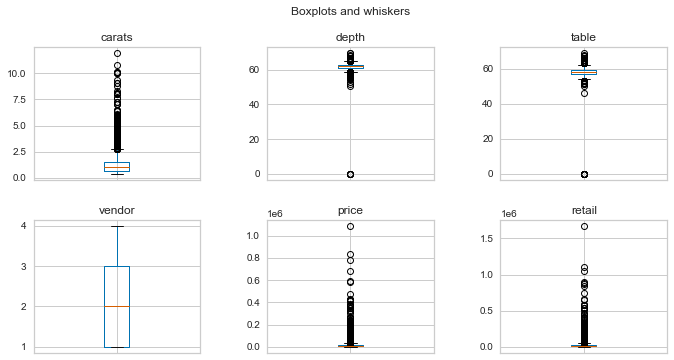

In [23]:
# Generate boxplots for each variable
fig, ax = plt.subplots(2,3)                                                 # Create a 3x4 grid of subplots
fig.set_size_inches((11,5))
fig.suptitle('Boxplots and whiskers', y=1.01)
plt.subplots_adjust(left=0.1,                                               # Adjust the space between the subplots
                    bottom=0.05, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.3)
# Iterate over the axes and the quantitative variable to create plots
cols = ['carats', 'depth', 'table', 'vendor', 'price', 'retail']

col_index = 0
for row in range(2):                                                       
    for col in range(3):                                                    
        current_col = cols[col_index]                              
        ax[row][col].set_title(current_col)
        ax[row][col].tick_params(top=False, bottom=False,                   # Remove ticks
        left=True, right=False, labelleft=True, labelbottom=False)
        df_train.boxplot(column=[current_col], ax=ax[row][col])
        col_index += 1
